In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# read penguin data
penguin_data = pd.read_csv('penguins.csv')

In [3]:
# first 5 records of data
penguin_data.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [4]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
#statistics
penguin_data.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean       NaN     NaN       43.921930      17.151170         200.915205   
std        NaN     NaN        5.459584       1.974793          14.061714   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.225000      15.600000         190.000000   
50%        NaN     NaN       44.450000      17.300000         197.000000   
75%        NaN     NaN       48.500000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    342.000000   333   344.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4201.754386   NaN  2008.029070  
std      801.954536   NaN     0.818356  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4750.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

In [6]:
# filling null values
penguin_data['bill_length_mm'].fillna(penguin_data['bill_length_mm'].median(),inplace = True)
penguin_data['bill_depth_mm'].fillna(penguin_data['bill_depth_mm'].median(),inplace = True)
penguin_data['flipper_length_mm'].fillna(penguin_data['flipper_length_mm'].median(),inplace = True)
penguin_data['body_mass_g'].fillna(penguin_data['body_mass_g'].median(),inplace = True)
penguin_data['sex'].fillna(penguin_data['sex'].mode()[0],inplace = True)

In [7]:
# convert string columns to categorical columns
penguin_data['island'] = penguin_data['island'].astype('category')
penguin_data['sex'] = penguin_data['sex'].astype('category')
penguin_data['species'] = penguin_data['species'].astype('category')

In [8]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
 7   year               344 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 14.9 KB


In [9]:
# encoding categorical columns
penguin_data = pd.get_dummies(penguin_data,columns = ['species','island'])
penguin_data['sex'] = penguin_data['sex'].map({'female': 1, 'male': 0}).astype('int')

In [10]:
# normalizing the numerical columns
numcols =['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
for i in numcols:
    penguin_data[i] = (penguin_data[i]-penguin_data[i].min())/(penguin_data[i].max()-penguin_data[i].min())

In [11]:
penguin_data

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  year  \
0          0.254545       0.666667           0.152542     0.291667    0  2007   
1          0.269091       0.511905           0.237288     0.305556    1  2007   
2          0.298182       0.583333           0.389831     0.152778    1  2007   
3          0.449091       0.500000           0.423729     0.375000    0  2007   
4          0.167273       0.738095           0.355932     0.208333    1  2007   
..              ...            ...                ...          ...  ...   ...   
339        0.861818       0.797619           0.593220     0.361111    0  2009   
340        0.414545       0.595238           0.508475     0.194444    1  2009   
341        0.636364       0.607143           0.355932     0.298611    0  2009   
342        0.680000       0.702381           0.644068     0.388889    0  2009   
343        0.658182       0.666667           0.440678     0.298611    1  2009   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0               0              0   
1                 1                  0               0              0   
2                 1                  0               0              0   
3                 1                  0               0              0   
4                 1                  0               0              0   
..              ...                ...             ...            ...   
339               0                  1               0              0   
340               0                  1               0              0   
341               0                  1               0              0   
342               0                  1               0              0   
343               0                  1               0              0   

     island_Dream  island_Torgersen  
0               0                 1  
1               0                 1  
2               0                 1  
3               0                 1  
4               0                 1  
..            ...               ...  
339             1                 0  
340             1                 0  
341             1                 0  
342             1                 0  
343             1                 0  

[344 rows x 12 columns]

In [12]:
# feature selection
penguin_data = penguin_data.drop('year',axis = 1)

In [13]:
# Split data into test and train
penguin_data = penguin_data.sample(frac=1)
train_data = penguin_data[0:int(len(penguin_data)*0.8)]
test_data = penguin_data[int(len(penguin_data)*0.8):]

In [14]:
# X_train,y_train, X_test, y_test
X_train = np.array(train_data.drop('sex',axis = 1))
y_train = np.array(train_data['sex']).reshape(-1,1)
X_test = np.array(test_data.drop('sex',axis = 1))
y_test = np.array(test_data['sex']).reshape(-1,1)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (275, 10)
Shape of y_train: (275, 1)
Shape of X_test: (69, 10)
Shape of y_test: (69, 1)


In [15]:
# Logistic Regression
class LogitRegression():
    def __init__(self, learning_rate,number_of_iterations):
      # Takes as an input hyperparameters: learning rate and the number of iterations.
      self.learning_rate = learning_rate
      self.number_of_iterations = number_of_iterations
    
    def sigmoid(self,z):
      # Define a sigmoid function
      return 1/(1+np.exp(-z))
    
    def cost(self,y_true,y_pred):
      # Define Loss function for Logistic Regression
      J = -(np.sum((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred))))/y_true.shape[0]
      return J
    
    def gradient_descent(self,x,y_true,y_pred):
      # Define Gradient Descent
      delta = y_pred-y_true
      gB = np.sum(delta)/x.shape[0]
      gW = np.dot(x.T,delta)/x.shape[0]
      return gB,gW
    
    def fit(self,x,y):
      #model training by optimizing weights using cost function and gradient descent
      self.w = np.random.rand(x.shape[1]).reshape(1,-1)
      self.b = 0
      loss = []
      for i in range(self.number_of_iterations):
        pred = self.sigmoid(np.dot(x,self.w.T) + self.b)
        gB,gW = self.gradient_descent(x,y,pred)
        self.b -= self.learning_rate*gB
        self.w -= self.learning_rate*(gW.T)
        J = self.cost(y,pred)
        loss.append(J)
      print("Weights",self.w)
      print("Loss",loss)
      plt.plot(loss)
      plt.title("Loss at every iteration")
      plt.xlabel("Number of Iterations")
      plt.ylabel("Loss")
        
    def predict(self, x):
      #predictions for new data
      pred = self.sigmoid(np.dot(x,self.w.T) + self.b)
      predictions = []
      for val in pred:
          if val >= 0.5:
              predictions.append(1)
          else:
              predictions.append(0)
      return predictions

In [16]:
def accuracy(y_pred):
  count = 0
  for i in range(len(y_pred)):
      if y_pred[i] == y_test[i]:
          count += 1
  print("Accuracy",count / len(y_pred) * 100)

Weights [[-1.21629217 -2.64197835 -0.7402475  -1.97398728  0.56038923  0.89066295
   0.76376085  1.00376736  0.93034097  0.6701432 ]]
Loss [1.1385310973084577, 1.138114915383541, 1.137698998868893, 1.1372833477887574, 1.136867962167126, 1.1364528420277389, 1.1360379873940853, 1.1356233982894022, 1.135209074736674, 1.1347950167586347, 1.1343812243777647, 1.1339676976162927, 1.1335544364961954, 1.1331414410391971, 1.1327287112667699, 1.1323162472001318, 1.1319040488602512, 1.1314921162678404, 1.1310804494433615, 1.1306690484070225, 1.1302579131787789, 1.1298470437783328, 1.1294364402251333, 1.1290261025383763, 1.1286160307370048, 1.1282062248397084, 1.1277966848649228, 1.12738741083083, 1.1269784027553595, 1.1265696606561861, 1.1261611845507316, 1.125752974456163, 1.125345030389395, 1.124937352367087, 1.124529940405645, 1.1241227945212207, 1.1237159147297116, 1.1233093010467614, 1.1229029534877593, 1.1224968720678394, 1.1220910568018831, 1.121685507704516, 1.1212802247901092, 1.120875208

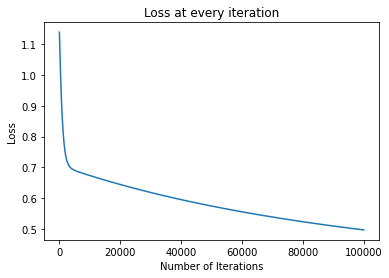

In [17]:
# model training and predictions with learning rate = 1e-3,number of iterations = 100000
model = LogitRegression(1e-3,100000)
model.fit(X_train,y_train)
y_pred=list(model.predict(X_test))
accuracy(y_pred)

Weights [[-10.65126594 -13.43386667   0.1524271  -11.76814045   1.28181191
    6.34227748   3.26872539   3.6819486    3.06601647   3.33457246]]
Loss [1.2153635037735606, 1.0348049072341043, 0.9075251897311262, 0.8260897589765834, 0.7777973676453173, 0.7503157443299656, 0.7346921274473043, 0.7254525350665906, 0.7195593394647068, 0.7154099264801587, 0.7121784993470148, 0.7094431125576162, 0.7069879724305925, 0.7047017808790456, 0.7025261576392631, 0.7004296069151769, 0.6983943923723586, 0.6964099117457223, 0.6944693411937144, 0.6925679253620434, 0.6907020970210394, 0.6888690160539411, 0.6870663214621006, 0.6852919924775094, 0.6835442663402185, 0.6818215861714356, 0.6801225653905699, 0.6784459616843568, 0.6767906568517812, 0.6751556405335185, 0.6735399966991401, 0.671942892216098, 0.6703635670656707, 0.6688013259052191, 0.6672555307548733, 0.6657255946362276, 0.6642109760240066, 0.6627111739957952, 0.661225723983374, 0.6597541940438951, 0.6582961815811706, 0.6568513104573778, 0.6554192284

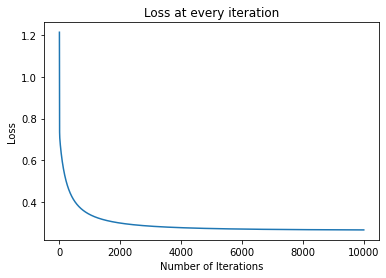

In [18]:
# model training and predictions with learning rate = 0.45,number of iterations = 10000
model = LogitRegression(0.45, 10000)  
model.fit(X_train, y_train)
y_pred=list(model.predict(X_test))
accuracy(y_pred)

Weights [[-5.83731723 -8.51913959 -1.26433101 -7.89116816  1.00413352  3.76982705
   2.78774379  2.69563215  2.41903521  2.48460067]]
Loss [1.421964639530892, 1.4170916753507774, 1.4122360704751828, 1.4073979009735946, 1.4025772422242082, 1.397774168898193, 1.392988754944004, 1.3882210735717537, 1.3834711972376426, 1.3787391976284642, 1.3740251456461792, 1.369329111392577, 1.3646511641540229, 1.359991372386301, 1.3553498036995573, 1.3507265248433529, 1.3461216016918267, 1.3415350992289852, 1.3369670815341128, 1.3324176117673214, 1.3278867521552342, 1.3233745639768206, 1.3188811075493805, 1.31440644221469, 1.3099506263253102, 1.3055137172310691, 1.3010957712657198, 1.2966968437337847, 1.292316988897587, 1.287956259964482, 1.2836147090742853, 1.2792923872869146, 1.2749893445702418, 1.270705629788165, 1.2664412906889084, 1.26219637389355, 1.2579709248847877, 1.2537649879959467, 1.2495786064002354, 1.2454118221002508, 1.2412646759177466, 1.237137207483658, 1.2330294552283994, 1.22894145637

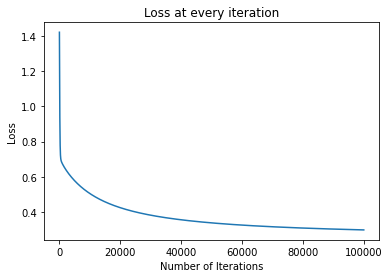

In [19]:
# model training and predictions with learning rate = 0.009,number of iterations = 100000
model = LogitRegression(0.009, 100000)  
model.fit(X_train, y_train)
y_pred=list(model.predict(X_test))
accuracy(y_pred)

In [20]:
# saving model to pickle file
pickle.dump(model, open('model.pkl', 'wb'))